In [12]:
f = open("../dat/parsed_books/mml-book.txt", "r")
raw_text = f.read()

## String search as a baseline
Maybe a simple string search can reveal the distribution of concepts.

In [14]:
import re
positions_le = [m.start() for m in re.finditer('linear equation', raw_text)]
positions_lr = [m.start() for m in re.finditer('linear regression', raw_text)]

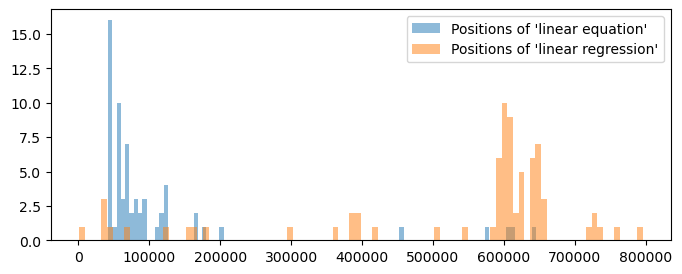

In [15]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,3))
plt.hist(positions_le, bins=100, alpha=0.5, label="Positions of 'linear equation'")
plt.hist(positions_lr, bins=100, alpha=0.5, label="Positions of 'linear regression'")
plt.legend()
plt.show()

Even though linear regression is mentioned first, it looks like linear equation might be an easier concept because it its center of weight is much earlier in the book than linear regression. This suggests taking median/mean instead of first occurence.

# Use KCs from Wikifier

In [5]:
import pickle
KCs = pickle.load(open("../dat/KCs_mml.pkl", "rb" ))

In [9]:
{title: len(v['occurences']) for title, v in KCs.items() if len(v['occurences']) > 2}

{'Machine learning': 91,
 'Linear algebra': 14,
 'Linear regression': 7,
 'Analytic geometry': 3,
 'Matrix decomposition': 3,
 'Vector calculus': 5,
 'Computer science': 4,
 'Principal component analysis': 5,
 'Mixture model': 3,
 'Support-vector machine': 5,
 'Linear independence': 28,
 'Mathematics': 11,
 'Euclidean vector': 13,
 'Real number': 3,
 'Complex number': 4,
 'Vector space': 40,
 'Dot product': 4,
 'Identity matrix': 5,
 'Kernel (linear algebra)': 3,
 'Subscript and superscript': 13,
 'Random variable': 3,
 'Dimensionality reduction': 7,
 'Tor (rock formation)': 3,
 'System of linear equations': 44,
 'Free variables and bound variables': 4,
 'Matrix (mathematics)': 5,
 'Row and column vectors': 3,
 'Fraction': 48,
 'Matrix multiplication': 11,
 'Gaussian elimination': 11,
 'Augmented matrix': 7,
 'AJB': 3,
 'Row echelon form': 13,
 'Pivot element': 15,
 'Iterative method': 3,
 'Inverse element': 10,
 'Identity element': 10,
 'Abelian group': 4,
 'General linear group': 3,


Let's try an describe the distribution of the terms:

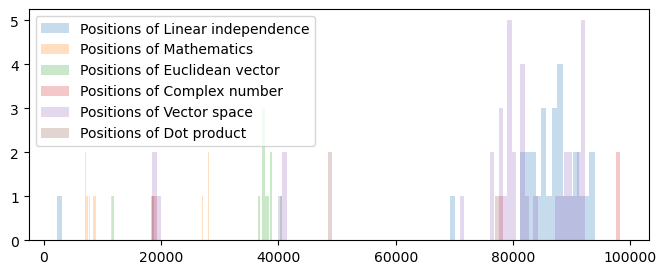

In [24]:
plt.figure(figsize=(8,3))
for title, v in list(KCs.items())[10:50]:
    if len(v['occurences']) > 3:
        plt.hist([o['intvl'].left for o in v['occurences']], bins=100, alpha=0.25, label="Positions of " + title)
plt.legend()
plt.show()

In [10]:
import numpy as np
{title: np.mean([o['intvl'].left for o in v['occurences']]) for title, v in KCs.items() if len(v['occurences']) > 2}

{'Machine learning': 17384.0989010989,
 'Linear algebra': 39458.71428571428,
 'Linear regression': 37112.71428571428,
 'Analytic geometry': 21042.0,
 'Matrix decomposition': 21155.666666666668,
 'Vector calculus': 29952.6,
 'Computer science': 26601.75,
 'Principal component analysis': 16333.6,
 'Mixture model': 18746.333333333332,
 'Support-vector machine': 7695.2,
 'Linear independence': 83492.78571428571,
 'Mathematics': 13653.90909090909,
 'Euclidean vector': 35903.61538461538,
 'Real number': 41572.0,
 'Complex number': 73277.25,
 'Vector space': 75848.375,
 'Dot product': 48476.25,
 'Identity matrix': 49269.0,
 'Kernel (linear algebra)': 60442.666666666664,
 'Subscript and superscript': 76934.76923076923,
 'Random variable': 20232.666666666668,
 'Dimensionality reduction': 41287.0,
 'Tor (rock formation)': 69306.0,
 'System of linear equations': 58327.47727272727,
 'Free variables and bound variables': 58201.0,
 'Matrix (mathematics)': 55098.6,
 'Row and column vectors': 47996.66